In [1]:
import numpy as np
from StatisticalAnalysis import compare_methods

In [2]:
import warnings
warnings.filterwarnings('ignore')

First we load the data and process it to have the correct form.

In [3]:
ts = np.load('tsAutoencoderSparse.npy')

In [4]:
ts_hc = ts[0:52]
ts_schz = ts[52:]

In [5]:
ts_hc.shape

(52, 32)

In [6]:
ts_hc = ts_hc.reshape(52,32)

In [7]:
ts_schz = ts_schz.reshape(50,32)

In [8]:
X = np.append(ts_hc,ts_schz,axis=0)

In [9]:
X.shape

(102, 32)

In [10]:
X[0].shape

(32,)

In [11]:
Y = np.append(np.zeros(52),np.ones(50),axis=0)

In [12]:
Y.shape

(102,)

Now, we define the algorithms that we are going to use. 

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy.stats import randint as sp_randint

In [14]:
# Decision tree
clfTree = DecisionTreeClassifier(random_state=84)
param_distTree = {"min_samples_split": sp_randint(3, 30)}
# SVM
clfSVC = SVC(random_state=84)
param_distSVC = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],'kernel': ['rbf'], 'class_weight':['balanced', None]}
# KNN
clfKNN = KNeighborsClassifier()
param_distKNN = {'n_neighbors':sp_randint(3, 30)}
# Logistic regression
clfLR = LogisticRegression(random_state=84)
param_distLR = {'C': [0.1,0.5,1, 10, 100, 1000]}
# Neural Network
clfMLP = MLPClassifier(random_state=84)
param_distMLP = {'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'],
                 'alpha': sp_randint(0.0001, 1), 'learning_rate': ['constant', 'invscaling', 'adaptive'],
                 'hidden_layer_sizes': [(5,2), (3,3,3), (5,3,2), (5,4,3,2)],
                 'momentum': [0.9, 0.95, 0.99]}
# RandomForest
clfRF = RandomForestClassifier(random_state=84)
param_distRF =  {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)], 'max_features': ['auto', 'sqrt'],'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                 'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],
                 'bootstrap': [True, False]}
# ExtraTreesClassifier
clfET = ExtraTreesClassifier(random_state=84)
param_distET =  {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)], 'max_features': ['auto', 'sqrt'],'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                 'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],
                 'bootstrap': [True, False]}

In [15]:
listAlgorithms = [clfTree,clfSVC,clfKNN,clfLR,clfMLP,clfRF,clfET]

In [16]:
listParams = [param_distTree,param_distSVC,param_distKNN,param_distLR,param_distMLP,param_distRF, param_distET]

In [17]:
listNames = ["Arbol", "SVM", "KNN", "LR", "MLP","RF","ET"]

# Plain comparison

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.613631 (0.172401)
SVM: 0.606429 (0.145900)
KNN: 0.580119 (0.137583)
LR: 0.609345 (0.193816)
MLP: 0.650893 (0.160372)
RF: 0.720774 (0.161186)
ET: 0.636548 (0.155947)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.978579, p:0.273815
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.287242, p:0.940909
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

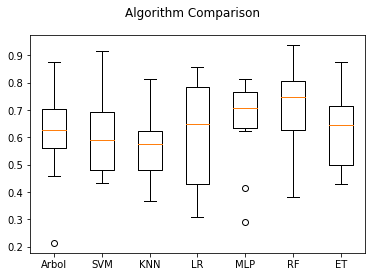

In [18]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.598333 (0.206620)
SVM: 0.595000 (0.238287)
KNN: 0.600000 (0.297489)
LR: 0.580238 (0.263024)
MLP: 0.685000 (0.301703)
RF: 0.685000 (0.197266)
ET: 0.600000 (0.331662)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.929659, p:0.000719
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.983420, p:0.444090
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

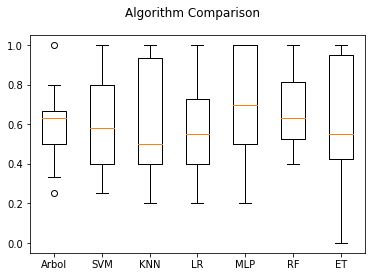

In [19]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.608333 (0.210108)
SVM: 0.581548 (0.271340)
KNN: 0.458929 (0.255390)
LR: 0.604167 (0.198693)
MLP: 0.626786 (0.208453)
RF: 0.720833 (0.213266)
ET: 0.510714 (0.250422)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.962893, p:0.036242
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.248473, p:0.958177
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

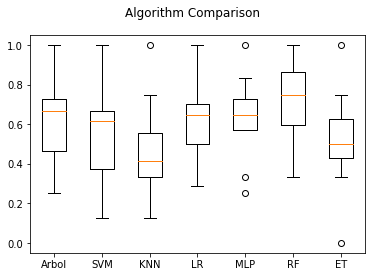

In [20]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.595455 (0.160847)
SVM: 0.559091 (0.159920)
KNN: 0.521818 (0.132628)
LR: 0.577273 (0.169552)
MLP: 0.618182 (0.159389)
RF: 0.704545 (0.140557)
ET: 0.617273 (0.116523)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.947654, p:0.005474
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.285357, p:0.941813
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

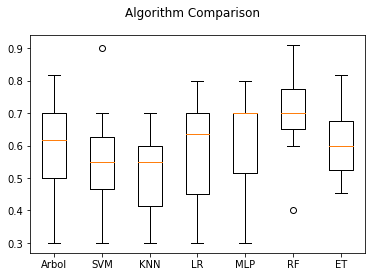

In [21]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='accuracy')